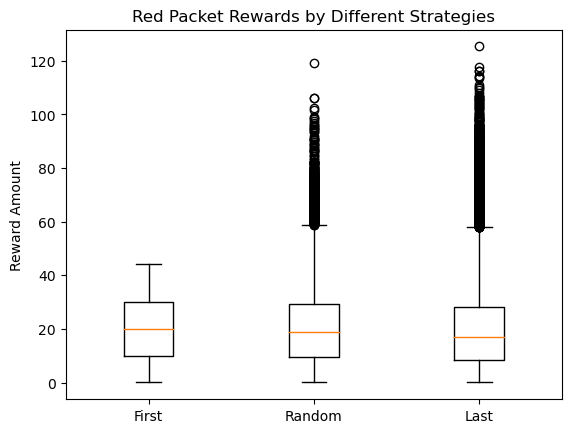

ANOVA F-value: 0.27337000857023674
ANOVA P-value: 0.7608114184190895
Fail to reject the null hypothesis. There is no significant difference between the strategies at the 0.05 significance level.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
def luck_money(total, num):
    tmp = num
    for i in range(num-1):       
        hb = round(random.uniform(0.01, total/num*2), 2)
        total = total - hb
        if total <= num*0.01:   
            total = total + hb
            num -= 1
            hb = total - num*0.01
            yield round(hb, 2)
            for j in range(i+1, tmp):   
                yield 0.01
            break                       
        yield hb
        num -= 1
    else:                       
        total = round(total, 2)
        yield total

def execute_strategy(total_amount, num_packets, strategy, num_rounds):
    user_rewards = np.zeros((num_rounds,))

    for round_ in range(num_rounds):
        generator = luck_money(total_amount, num_packets)
        if strategy == 'first':
            next(generator)
        elif strategy == 'last':
            for _ in range(num_packets - 1):
                next(generator)
        else:
            step = random.randint(0, num_packets - 1)
            for _ in range(step):
                next(generator)
        user_rewards[round_] = next(generator)

    return user_rewards


total_amount = 200
num_packets = 10    
num_rounds = 100000  

first_strategy_rewards = execute_strategy(total_amount, num_packets, 'first', num_rounds)
random_strategy_rewards = execute_strategy(total_amount, num_packets, 'random', num_rounds)
last_strategy_rewards = execute_strategy(total_amount, num_packets, 'last', num_rounds)

strategies = ['First', 'Random', 'Last']
rewards = [first_strategy_rewards, random_strategy_rewards, last_strategy_rewards]

plt.boxplot(rewards, labels=strategies)
plt.title('Red Packet Rewards by Different Strategies')
plt.ylabel('Reward Amount')
plt.show()

combined_rewards = np.concatenate((first_strategy_rewards, random_strategy_rewards, last_strategy_rewards))

strategy_labels = np.repeat(strategies, num_rounds)[:len(combined_rewards)]
# ANOVA检验
f_val, p_val = stats.f_oneway(*[combined_rewards[strategy_labels == strategy] for strategy in strategies])

print("ANOVA F-value:", f_val)
print("ANOVA P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print(f"Reject the null hypothesis. There is a significant difference between the strategies at the {alpha} significance level.")
if p_val> alpha :
    print(f"Fail to reject the null hypothesis. There is no significant difference between the strategies at the {alpha} significance level.")